In [1]:
import pandas as pd

# Carga de archivo csv.
retail_sales = pd.read_csv("retail_sales_dataset.csv", sep=",", encoding="utf-8")
# Imprime información general
print(retail_sales.info())
# Resumen estadistico.
print(retail_sales.describe())
# Muestra las 5 primeras filas del dataframe.
retail_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [196]:
# Diccionarios finales para guardar resultados por género y rango
resultados_female = {}
resultados_male = {}

# Función para contar productos por categoría
def cantidad_producto_categoria(data):
    productos = {"Clothing": 0, "Electronics": 0, "Beauty": 0}
    for categoria in data:
        if categoria in productos:
            productos[categoria] += 1
    return productos

# Datos de configuración
generos = ["Female", "Male"]
rango_edad = {
    "20-29": [20, 29],
    "30-39": [30, 39],
    "40-49": [40, 49],
    "50-59": [50, 59],
    "60-69": [60, 69]
}

# Iterar por rango y género
for nombre_rango, edad in rango_edad.items():
    for genero in generos:
        # Filtrar por edad y género
        filtro = (retail_sales["Age"] >= edad[0]) & (retail_sales["Age"] <= edad[1])
        filtro_genero = retail_sales[filtro & (retail_sales["Gender"] == genero)]
        data = filtro_genero["Product Category"]
        
        # Llamar a la función para contar
        resultado = cantidad_producto_categoria(data)
        
        # Mostrar resultados
        print(f"\n{genero} entre {nombre_rango}")
        for k, v in resultado.items():
            print(f"  {k}: {v}")
        
        # Guardar resultado en diccionario correspondiente
        if genero == "Female":
            resultados_female[nombre_rango] = resultado
        else:
            resultados_male[nombre_rango] = resultado

# Mostrar los resultados finales
print("\n=== Resultados Finales ===")
print("Compras femeninas:")
print(resultados_female)
print("\nCompras masculinas:")
print(resultados_male)


Female entre 20-29
  Clothing: 34
  Electronics: 33
  Beauty: 38

Male entre 20-29
  Clothing: 41
  Electronics: 32
  Beauty: 31

Female entre 30-39
  Clothing: 25
  Electronics: 36
  Beauty: 32

Male entre 30-39
  Clothing: 36
  Electronics: 30
  Beauty: 32

Female entre 40-49
  Clothing: 50
  Electronics: 36
  Beauty: 35

Male entre 40-49
  Clothing: 36
  Electronics: 35
  Beauty: 30

Female entre 50-59
  Clothing: 37
  Electronics: 36
  Beauty: 39

Male entre 50-59
  Clothing: 41
  Electronics: 45
  Beauty: 23

Female entre 60-69
  Clothing: 24
  Electronics: 18
  Beauty: 13

Male entre 60-69
  Clothing: 17
  Electronics: 25
  Beauty: 18

=== Resultados Finales ===
Compras femeninas:
{'20-29': {'Clothing': 34, 'Electronics': 33, 'Beauty': 38}, '30-39': {'Clothing': 25, 'Electronics': 36, 'Beauty': 32}, '40-49': {'Clothing': 50, 'Electronics': 36, 'Beauty': 35}, '50-59': {'Clothing': 37, 'Electronics': 36, 'Beauty': 39}, '60-69': {'Clothing': 24, 'Electronics': 18, 'Beauty': 13}}

C

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# lista que guardara los registros.
datos_df = []

# Convertir los diccionarios a filas individuales.
for edad, categorias in resultados_female.items():
    for categoria, cantidad in categorias.items():
        datos_df.append({"Edad": edad, "Genero": "Female", "Categoría": categoria, "Cantidad": cantidad})
        
for edad, categorias in resultados_male.items():
    for categoria, cantidad in categorias.items():
        datos_df.append({"Edad": edad, "Genero": "Male", "Categoría": categoria, "Cantidad": cantidad})
        
resultado_df = pd.DataFrame(datos_df)
resultado_df

,Edad,Genero,Categoría,Cantidad
0,20-29,Female,Clothing,34
1,20-29,Female,Electronics,33
2,20-29,Female,Beauty,38
3,30-39,Female,Clothing,25
4,30-39,Female,Electronics,36
5,30-39,Female,Beauty,32
6,40-49,Female,Clothing,50
7,40-49,Female,Electronics,36
8,40-49,Female,Beauty,35
9,50-59,Female,Clothing,37


/tmp/ipykernel_3080/1118963223.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=resultado_df,


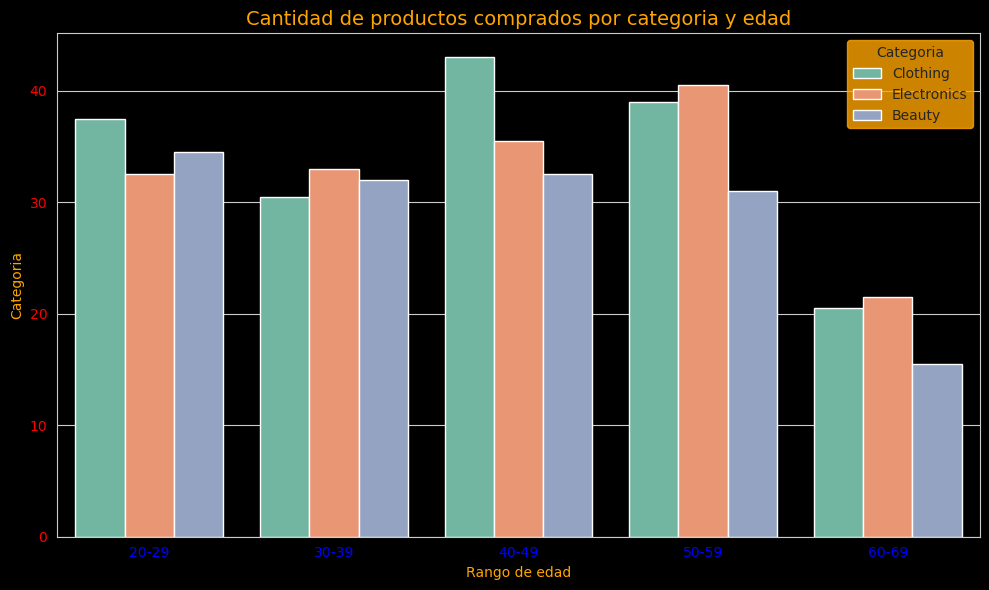

In [242]:
# graficar en barras y ver como luce.clear
sns.set_style('whitegrid')

# barras agrupadas.
fig = plt.figure(figsize=(10, 6))
# Fondo del lienzo (área fuera del gráfico)
fig.patch.set_facecolor("black")

grafico = sns.barplot(data=resultado_df,
                    x="Edad",
                    y="Cantidad",
                    hue="Categoría",
                    ci=None,
                    palette="Set2"
                    )
# Gráfico personalizado.
grafico.set_facecolor("black")
# Color del texto en los ejes
grafico.set_xlabel("Edad", color="orange")
grafico.set_ylabel("Categoria", color="orange")
# Fondo de los ejes
grafico.tick_params(axis="x", colors="blue")
grafico.tick_params(axis="y" ,colors="red")
# Fondo para la estiquetas
grafico.xaxis.label.set_backgroundcolor(color="black")
grafico.yaxis.label.set_backgroundcolor(color="black")

# Titulos y Etiquetas.
plt.title("Cantidad de productos comprados por categoria y edad", fontsize=14, color="orange")
plt.xlabel("Rango de edad")
plt.ylabel("Categoria")
plt.legend(title="Categoria", facecolor="orange", edgecolor="orange")
plt.tight_layout()

